# **FAKE NEWS DETECTION**

## Count Vectorizer and Multinomial NB

In [1]:
# import libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import itertools

In [2]:
# load dataset
url = r'C:\Users\Lenovo\Downloads\fake-news-detection\fake_or_real_news.csv'
df = pd.read_csv(url)

In [3]:
# dataset info
df.shape
df.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
# change index
df = df.set_index('Unnamed: 0')
df.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
# separate the label
y = df.label
df = df.drop('label', axis = 1)

In [6]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size = 0.33, random_state = 53)

In [7]:
# initialize variables for feature extraction
count_vect = CountVectorizer(stop_words = 'english')
count_train = count_vect.fit_transform(X_train)
count_test = count_vect.transform(X_test)

count_vect.get_feature_names()[:10] 

['00',
 '000',
 '0000',
 '00000031',
 '000035',
 '00006',
 '0001',
 '0001pt',
 '000ft',
 '000km']

In [8]:
# convert to dataframe
count_df = pd.DataFrame(count_train.A, columns = count_vect.get_feature_names())
count_df.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# confusion matrix function
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion Matrix', cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion Matrix without Normalization')

    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment = 'center', color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [10]:
# training the model
model = MultinomialNB() 
model.fit(count_train, y_train)

MultinomialNB()

In [11]:
# predicting the data
pred = model.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print('Accuracy: %0.3f' % score)

Accuracy: 0.893


Confusion Matrix without Normalization


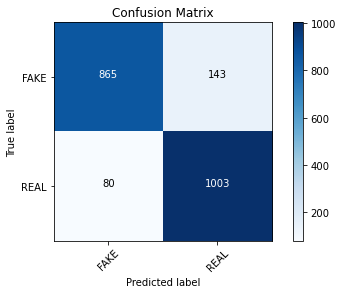

In [12]:
# plot confusion matrix
cm = metrics.confusion_matrix(y_test, pred, labels = ['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes = ['FAKE', 'REAL']) 

## TFID Vectorizer and Passive Agressive Classifier


In [13]:
# import libraries
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
# initialize variables for feature extraction
tfid_vect = TfidfVectorizer(stop_words='english', max_df=0.7)
tfid_train = tfid_vect.fit_transform(X_train)
tfid_test = tfid_vect.transform(X_test)

tfid_vect.get_feature_names()[-10:] 

['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']

In [15]:
# convert to dataframe
count_df = pd.DataFrame(tfid_train.A, columns = tfid_vect.get_feature_names())
count_df.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# train the model
model_clf = PassiveAggressiveClassifier(max_iter=50)
model_clf.fit(tfid_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [17]:
# predict the data
pred = model_clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print('Accuracy: %0.3f' % score)

Accuracy: 0.858


Confusion Matrix without Normalization


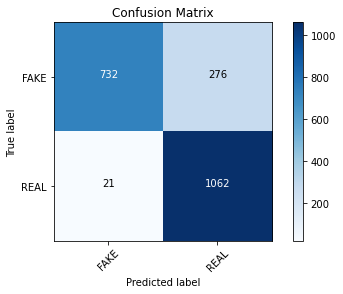

In [18]:
# plot confusion matrix
cm = metrics.confusion_matrix(y_test, pred, labels = ['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes = ['FAKE', 'REAL']) 

## TFID Transformer, Count Vectorizer, and SGD Classifier

In [19]:
# import libraries
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfTransformer

In [20]:
# build a pipeline
text_clf = Pipeline([
                     ('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, 
                                           random_state=42, max_iter=5, tol=None))])

In [21]:
# train the model
text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [22]:
# predict the data
preds = text_clf.predict(X_test)
scores = metrics.accuracy_score(y_test, preds)
print('Accuracy: %0.3f' % scores)

Accuracy: 0.908


Confusion Matrix without Normalization


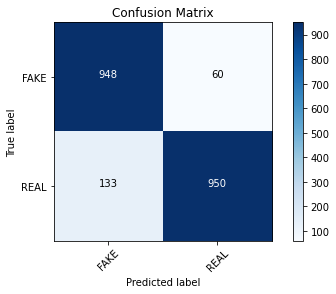

In [23]:
# plot confusion matrix
cm = metrics.confusion_matrix(y_test, preds, labels = ['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes = ['FAKE', 'REAL']) 